In [25]:
import pandas as pd
from pykrige.ok import OrdinaryKriging
import numpy as np
import matplotlib.pyplot as plt
import json

def generate_kriging_json(filename, num_points, output_file):
    # Load data
    data = pd.read_csv(filename)

    # Drop any rows with missing data
    data.dropna(subset=['Value', 'lat', 'lng'], inplace=True)

    # Extract coordinates and values
    latitudes = data['lat'].values
    longitudes = data['lng'].values
    values = data['Value'].values

    # Define grid based on the specified number of points
    grid_lon = np.linspace(data['lng'].min(), data['lng'].max(), num_points)
    grid_lat = np.linspace(data['lat'].min(), data['lat'].max(), num_points)
    grid_lon, grid_lat = np.meshgrid(grid_lon, grid_lat)

    # Initialize and execute Ordinary Kriging
    ok_model = OrdinaryKriging(
        longitudes, latitudes, values,
        variogram_model='exponential',  # Example: Using an exponential model
        variogram_parameters={'sill': 94.41677613785475, 'range': 0.1, 'nugget': 13.881621490664376},
        verbose=True,
        enable_plotting=False
    )
    z, ss = ok_model.execute('grid', grid_lon[0], grid_lat[:,0])

    # Create JSON output and save to file
    output = []
    for i in range(num_points):
        for j in range(num_points):
            output.append({
                "lat": grid_lat[i, j],
                "lon": grid_lon[i, j],
                "value": z[i, j]
            })
    
    with open(output_file, 'w') as f:
        json.dump(output, f, indent=4)
    
    print(f"Data saved to {output_file}")

# Example usage
generate_kriging_json('processed.csv', 100, 'interp_data.json')  # Specify the output filename here

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'exponential' Variogram Model
Partial Sill: 80.53515464719038
Full Sill: 94.41677613785475
Range: 0.1
Nugget: 13.881621490664376 

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...

Data saved to interp_data.json


Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'exponential' Variogram Model
Partial Sill: 80.53515464719038
Full Sill: 94.41677613785475
Range: 0.1
Nugget: 13.881621490664376 

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



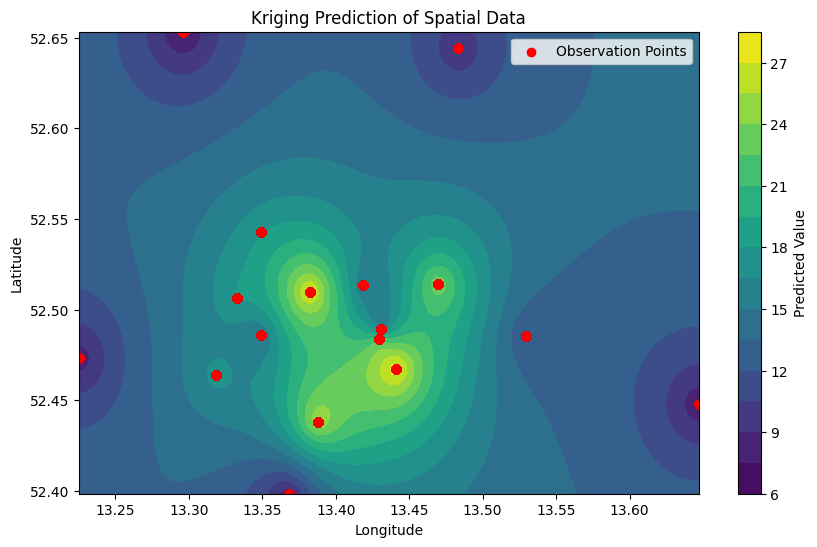

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging

# Load your data
data = pd.read_csv('processed.csv')

# Drop any rows with missing data
data.dropna(subset=['Value', 'lat', 'lng'], inplace=True)

# Extract coordinates and values
latitudes = data['lat'].values
longitudes = data['lng'].values
values = data['Value'].values

# Define a grid for plotting
grid_lon = np.linspace(data['lng'].min(), data['lng'].max(), 100)
grid_lat = np.linspace(data['lat'].min(), data['lat'].max(), 100)
grid_lon, grid_lat = np.meshgrid(grid_lon, grid_lat)

# Initialize Ordinary Kriging with specified variogram parameters
ok_model = OrdinaryKriging(
    longitudes, latitudes, values,
    variogram_model='exponential',  # Example: Using an exponential model
    variogram_parameters={'sill': 94.41677613785475, 'range': 0.1, 'nugget': 13.881621490664376},
    verbose=True,
    enable_plotting=False
)

# Perform the kriging on the defined grid
z, ss = ok_model.execute('grid', grid_lon[0], grid_lat[:,0])

# Plot the results
plt.figure(figsize=(10, 6))
contour = plt.contourf(grid_lon, grid_lat, z, cmap='viridis', levels=15)
plt.scatter(longitudes, latitudes, color='red', marker='o', label='Observation Points')
plt.colorbar(contour, label='Predicted Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Kriging Prediction of Spatial Data')
plt.legend()
plt.show()